<a href="https://colab.research.google.com/github/sssuixin/SHAPE-Final-Project/blob/main/Same_Correlation_For_Each_State.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset: "Fire From Space: Australia"
Wildfires = pd.read_csv("sample_data/Wildfires.csv")

Wildfires

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336.0,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336.0,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336.0,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336.0,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336.0,N,VIIRS,n,1.0NRT,293.5,4.1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877696,-31.81535,151.87944,317.8,0.37,0.58,2020-01-03,1536.0,N,VIIRS,n,1.0NRT,293.2,2.2,N
877697,-32.10886,151.34885,320.9,0.35,0.57,2020-01-03,1536.0,N,VIIRS,n,1.0NRT,294.3,2.6,N
877698,-32.10854,151.34439,310.9,0.35,0.57,2020-01-03,1536.0,N,VIIRS,n,1.0NRT,293.4,2.6,N
877699,-32.19404,151.34073,307.8,0.35,0.57,2020-01-03,1536.0,N,VIIRS,n,1.0NRT,293.0,1.1,N


In [ ]:
# Rounding latitude and longitude to integers
newLongitude = round(Wildfires.longitude, 0)
newLatitude = round(Wildfires.latitude, 0)

Wildfires.longitude = newLongitude
Wildfires.latitude = newLatitude

In [ ]:
# Add a new column representing the geographic coordinates (longitude, latitude)
Wildfires["Coordinate"] = list(zip(Wildfires["longitude"], Wildfires["latitude"]))
Wildfires["Coordinate"].value_counts()

(152.0, -31.0)    51978
(150.0, -33.0)    39393
(151.0, -33.0)    39214
(150.0, -34.0)    32364
(152.0, -29.0)    23091
                  ...  
(120.0, -34.0)        1
(129.0, -32.0)        1
(117.0, -28.0)        1
(145.0, -40.0)        1
(nan, -32.0)          1
Name: Coordinate, Length: 632, dtype: int64

In [ ]:
# Drop unnecessary columns
Wildfires = Wildfires.drop(columns = ["scan", "track", "satellite", "instrument", "confidence", "version", "daynight"], axis = 0)

In [ ]:
# From PJ
Filter = Wildfires.longitude<129
WesternAustralia=Wildfires.loc[Filter]

Filter1=Wildfires.latitude>-26
Filter2=Wildfires.longitude>129
Filter3=Wildfires.longitude<139
NorthernTerritory=Wildfires.loc[Filter1&Filter2&Filter3]

Filter4=Wildfires.latitude<-26
Filter5=Wildfires.longitude<141
SouthAustralia=Wildfires.loc[Filter4&Filter2&Filter5]

Filter6=Wildfires.longitude>139
Filter7=Wildfires.latitude>-29
Filter8=Wildfires.longitude>141
Queensland=Wildfires.loc[(Filter6&Filter5&Filter4)|(Filter7&Filter8)]

Filter9=Wildfires.latitude>-45
Filter10=Wildfires.latitude<-40
Tasmania=Wildfires.loc[Filter9&Filter10]

Filter11=Wildfires.latitude<-29
Filter12=-177.582*Wildfires.longitude-184.019*Wildfires.latitude>-19731.729
NewSouthWales=Wildfires.loc[Filter11&Filter8*Filter12]

Filter13=-177.582*Wildfires.longitude-184.019*Wildfires.latitude<-19731.729
Filter14=Wildfires.latitude>-40
Victoria=Wildfires.loc[Filter13&Filter8&Filter14]

#| for or, & for and, and ~ for not

In [ ]:
import numpy as np
WesternAustralia.sort_values("acq_date")
WesternAustralia["acq_date"] = pd.to_datetime(WesternAustralia.acq_date)
WesternAustralia["Difference"] = (WesternAustralia.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
WesternAustralia["Group"] = (WesternAustralia.Difference > 1).cumsum()
SAFirstDay = WesternAustralia.groupby(["Group", "longitude", "latitude"]).first()
# firstDayIndex
SAFirstDay["Duration"] = WesternAustralia.groupby(["Group", "longitude", "latitude"]).size()
# Wildfires.groupby("Group").size()
# Wildfires


# firstDayWildfire = Wildfires[firstDayIndex]

model1 = ols("(np.log(Duration) ~ np.log(frp) + np.log(bright_ti4))",SAFirstDay).fit()
model1.summary()

<ipython-input-50-561629dd29b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WesternAustralia["acq_date"] = pd.to_datetime(WesternAustralia.acq_date)
<ipython-input-50-561629dd29b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WesternAustralia["Difference"] = (WesternAustralia.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
<ipython-input-50-561629dd29b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Duration)   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     97.77
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.41e-42
Time:                        14:25:20   Log-Likelihood:                -11937.
No. Observations:                6688   AIC:                         2.388e+04
Df Residuals:                    6685   BIC:                         2.390e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -8.9032      2.415     -3.686      0.000     -13.638      -4.168
np.log(frp)            0.1105      0.022      4.988      0.000       0.067       0.154
np.log(bright_ti4)     1.8465      0.421      4.390      0.000       1.022       2.671
==============================================================================
Omnibus:                      251.349   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.929
Skew:                           0.418   Prob(JB):                     7.94e-53
Kurtosis:                       2.599   Cond. No.                         854.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np
NorthernTerritory.sort_values("acq_date")
NorthernTerritory["acq_date"] = pd.to_datetime(NorthernTerritory.acq_date)
NorthernTerritory["Difference"] = (NorthernTerritory.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
NorthernTerritory["Group"] = (NorthernTerritory.Difference > 1).cumsum()
NTFirstDay = NorthernTerritory.groupby(["Group", "longitude", "latitude"]).first()
# firstDayIndex
NTFirstDay["Duration"] = NorthernTerritory.groupby(["Group", "longitude", "latitude"]).size()
# Wildfires.groupby("Group").size()
# Wildfires


# firstDayWildfire = Wildfires[firstDayIndex]

model2 = ols("(np.log(Duration) ~ np.log(frp) + np.log(bright_ti4))", NTFirstDay).fit()
model2.summary()

<ipython-input-51-a262c5b0450d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NorthernTerritory["acq_date"] = pd.to_datetime(NorthernTerritory.acq_date)
<ipython-input-51-a262c5b0450d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NorthernTerritory["Difference"] = (NorthernTerritory.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
<ipython-input-51-a262c5b0450d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Duration)   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     77.41
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.08e-33
Time:                        14:25:21   Log-Likelihood:                -6978.7
No. Observations:                3877   AIC:                         1.396e+04
Df Residuals:                    3874   BIC:                         1.398e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -21.1151      3.546     -5.955      0.000     -28.067     -14.163
np.log(frp)            0.0749      0.032      2.311      0.021       0.011       0.138
np.log(bright_ti4)     3.9697      0.617      6.438      0.000       2.761       5.179
==============================================================================
Omnibus:                      170.137   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.732
Skew:                           0.347   Prob(JB):                     3.02e-28
Kurtosis:                       2.450   Cond. No.                         939.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np
SouthAustralia.sort_values("acq_date")
SouthAustralia["acq_date"] = pd.to_datetime(SouthAustralia.acq_date)
SouthAustralia["Difference"] = (SouthAustralia.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
SouthAustralia["Group"] = (SouthAustralia.Difference > 1).cumsum()
SAFirstDay = SouthAustralia.groupby(["Group", "longitude", "latitude"]).first()
# firstDayIndex
SAFirstDay["Duration"] = SouthAustralia.groupby(["Group", "longitude", "latitude"]).size()
# Wildfires.groupby("Group").size()
# Wildfires


# firstDayWildfire = Wildfires[firstDayIndex]

model3 = ols("(np.log(Duration) ~ np.log(frp) + np.log(bright_ti4))",SAFirstDay).fit()
model3.summary()

<ipython-input-52-421e6e0b6681>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SouthAustralia["acq_date"] = pd.to_datetime(SouthAustralia.acq_date)
<ipython-input-52-421e6e0b6681>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SouthAustralia["Difference"] = (SouthAustralia.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
<ipython-input-52-421e6e0b6681>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Duration)   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     22.81
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           3.92e-10
Time:                        14:25:21   Log-Likelihood:                -806.83
No. Observations:                 424   AIC:                             1620.
Df Residuals:                     421   BIC:                             1632.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.6666      9.798     -0.578      0.563     -24.925      13.592
np.log(frp)            0.3727      0.098      3.822      0.000       0.181       0.564
np.log(bright_ti4)     1.2342      1.705      0.724      0.470      -2.117       4.586
==============================================================================
Omnibus:                       20.608   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.489
Skew:                           0.550   Prob(JB):                     1.31e-05
Kurtosis:                       2.753   Cond. No.                         768.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np
Queensland.sort_values("acq_date")
Queensland["acq_date"] = pd.to_datetime(Queensland.acq_date)
Queensland["Difference"] = (Queensland.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
Queensland["Group"] = (Queensland.Difference > 1).cumsum()
QFirstDay = Queensland.groupby(["Group", "longitude", "latitude"]).first()
# firstDayIndex
QFirstDay["Duration"] = Queensland.groupby(["Group", "longitude", "latitude"]).size()
# Wildfires.groupby("Group").size()
# Wildfires


# firstDayWildfire = Wildfires[firstDayIndex]

model4 = ols("(np.log(Duration) ~ np.log(frp) + np.log(bright_ti4))",SAFirstDay).fit()
model4.summary()

<ipython-input-53-f8430895053a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Queensland["acq_date"] = pd.to_datetime(Queensland.acq_date)
<ipython-input-53-f8430895053a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Queensland["Difference"] = (Queensland.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
<ipython-input-53-f8430895053a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Duration)   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     22.81
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           3.92e-10
Time:                        14:25:21   Log-Likelihood:                -806.83
No. Observations:                 424   AIC:                             1620.
Df Residuals:                     421   BIC:                             1632.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.6666      9.798     -0.578      0.563     -24.925      13.592
np.log(frp)            0.3727      0.098      3.822      0.000       0.181       0.564
np.log(bright_ti4)     1.2342      1.705      0.724      0.470      -2.117       4.586
==============================================================================
Omnibus:                       20.608   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.489
Skew:                           0.550   Prob(JB):                     1.31e-05
Kurtosis:                       2.753   Cond. No.                         768.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np
Tasmania.sort_values("acq_date")
Tasmania["acq_date"] = pd.to_datetime(Tasmania.acq_date)
Tasmania["Difference"] = (Tasmania.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
Tasmania["Group"] = (Tasmania.Difference > 1).cumsum()
TFirstDay = Tasmania.groupby(["Group", "longitude", "latitude"]).first()
# firstDayIndex
TFirstDay["Duration"] = Tasmania.groupby(["Group", "longitude", "latitude"]).size()
# Wildfires.groupby("Group").size()
# Wildfires


# firstDayWildfire = Wildfires[firstDayIndex]

model5 = ols("(np.log(Duration) ~ np.log(frp) + np.log(bright_ti4))",TFirstDay).fit()
model5.summary()

<ipython-input-54-e532d631be21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tasmania["acq_date"] = pd.to_datetime(Tasmania.acq_date)
<ipython-input-54-e532d631be21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tasmania["Difference"] = (Tasmania.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
<ipython-input-54-e532d631be21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Duration)   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.713
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           0.000585
Time:                        14:25:22   Log-Likelihood:                -355.16
No. Observations:                 214   AIC:                             716.3
Df Residuals:                     211   BIC:                             726.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.3205     15.623      1.813      0.071      -2.477      59.118
np.log(frp)            0.5198      0.149      3.490      0.001       0.226       0.813
np.log(bright_ti4)    -4.7923      2.725     -1.759      0.080     -10.164       0.579
==============================================================================
Omnibus:                       48.786   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.036
Skew:                           1.221   Prob(JB):                     2.53e-18
Kurtosis:                       4.768   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import numpy as np
NewSouthWales.sort_values("acq_date")
NewSouthWales["acq_date"] = pd.to_datetime(NewSouthWales.acq_date)
NewSouthWales["Difference"] = (NewSouthWales.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
NewSouthWales["Group"] = (NewSouthWales.Difference > 1).cumsum()
NSWFirstDay = NewSouthWales.groupby(["Group", "longitude", "latitude"]).first()
# firstDayIndex
NSWFirstDay["Duration"] = NewSouthWales.groupby(["Group", "longitude", "latitude"]).size()
# Wildfires.groupby("Group").size()
# Wildfires


# firstDayWildfire = Wildfires[firstDayIndex]

model6 = ols("(np.log(Duration) ~ np.log(frp) + np.log(bright_ti4))", NSWFirstDay).fit()
model6.summary()

<ipython-input-55-ae7590aef54a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewSouthWales["acq_date"] = pd.to_datetime(NewSouthWales.acq_date)
<ipython-input-55-ae7590aef54a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewSouthWales["Difference"] = (NewSouthWales.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
<ipython-input-55-ae7590aef54a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Duration)   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     54.13
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           3.73e-23
Time:                        14:25:22   Log-Likelihood:                -2190.1
No. Observations:                1108   AIC:                             4386.
Df Residuals:                    1105   BIC:                             4401.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             26.3618      8.716      3.025      0.003       9.260      43.464
np.log(frp)            0.6728      0.083      8.107      0.000       0.510       0.836
np.log(bright_ti4)    -4.4234      1.519     -2.911      0.004      -7.405      -1.442
==============================================================================
Omnibus:                      220.787   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.524
Skew:                           1.274   Prob(JB):                     7.77e-82
Kurtosis:                       4.265   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import numpy as np
Victoria.sort_values("acq_date")
Victoria["acq_date"] = pd.to_datetime(Victoria.acq_date)
Victoria["Difference"] = (Victoria.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
Victoria["Group"] = (Victoria.Difference > 1).cumsum()
VFirstDay = Victoria.groupby(["Group", "longitude", "latitude"]).first()
# firstDayIndex
VFirstDay["Duration"] = Victoria.groupby(["Group", "longitude", "latitude"]).size()
# Wildfires.groupby("Group").size()
# Wildfires


# firstDayWildfire = Wildfires[firstDayIndex]

model7 = ols("(np.log(Duration) ~ np.log(frp) + np.log(bright_ti4))", NSWFirstDay).fit()
model7.summary()

<ipython-input-56-9f02a12255e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Victoria["acq_date"] = pd.to_datetime(Victoria.acq_date)
<ipython-input-56-9f02a12255e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Victoria["Difference"] = (Victoria.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
<ipython-input-56-9f02a12255e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Duration)   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     54.13
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           3.73e-23
Time:                        14:25:23   Log-Likelihood:                -2190.1
No. Observations:                1108   AIC:                             4386.
Df Residuals:                    1105   BIC:                             4401.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             26.3618      8.716      3.025      0.003       9.260      43.464
np.log(frp)            0.6728      0.083      8.107      0.000       0.510       0.836
np.log(bright_ti4)    -4.4234      1.519     -2.911      0.004      -7.405      -1.442
==============================================================================
Omnibus:                      220.787   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.524
Skew:                           1.274   Prob(JB):                     7.77e-82
Kurtosis:                       4.265   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Fire Radiative Power(FRP)')

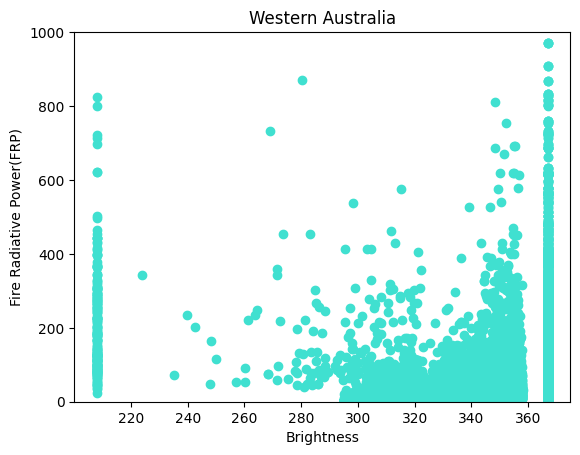

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

plt.scatter(WesternAustralia.bright_ti4, WesternAustralia.frp, color = "turquoise")
plt.ylim([0, 1000])
plt.title("Western Australia")
plt.xlabel("Brightness")
plt.ylabel("Fire Radiative Power(FRP)")

Text(0, 0.5, 'Fire Radiative Power(FRP)')

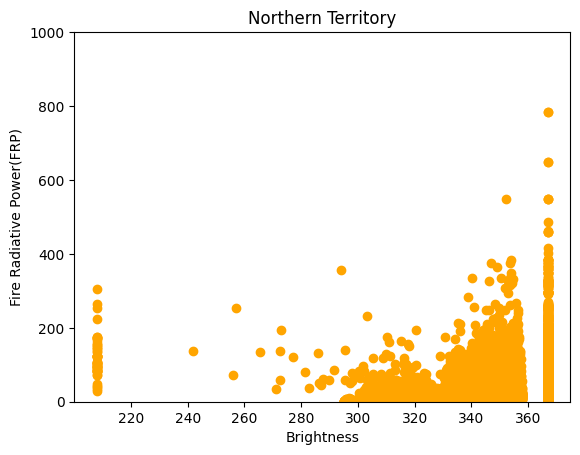

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

plt.scatter(NorthernTerritory.bright_ti4, NorthernTerritory.frp, color = "orange")
plt.ylim([0, 1000])

plt.title("Northern Territory")
plt.xlabel("Brightness")
plt.ylabel("Fire Radiative Power(FRP)")

Text(0, 0.5, 'Fire Radiative Power(FRP)')

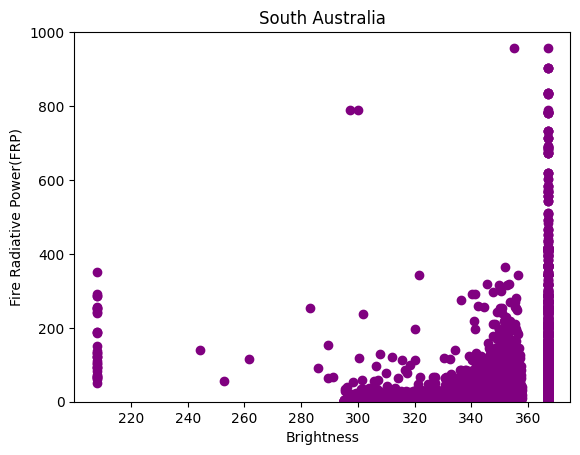

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

plt.scatter(SouthAustralia.bright_ti4, SouthAustralia.frp, color = "purple")
plt.ylim([0, 1000])

plt.title("South Australia")
plt.xlabel("Brightness")
plt.ylabel("Fire Radiative Power(FRP)")

Text(0, 0.5, 'Fire Radiative Power(FRP)')

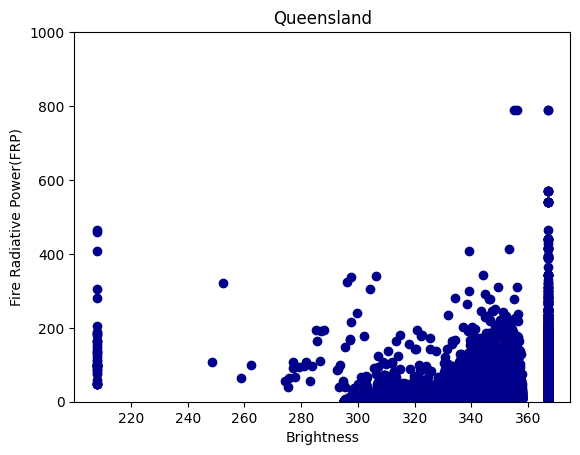

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

plt.scatter(Queensland.bright_ti4, Queensland.frp, color = "darkblue")
plt.ylim([0, 1000])

plt.title("Queensland")
plt.xlabel("Brightness")
plt.ylabel("Fire Radiative Power(FRP)")

Text(0, 0.5, 'Fire Radiative Power(FRP)')

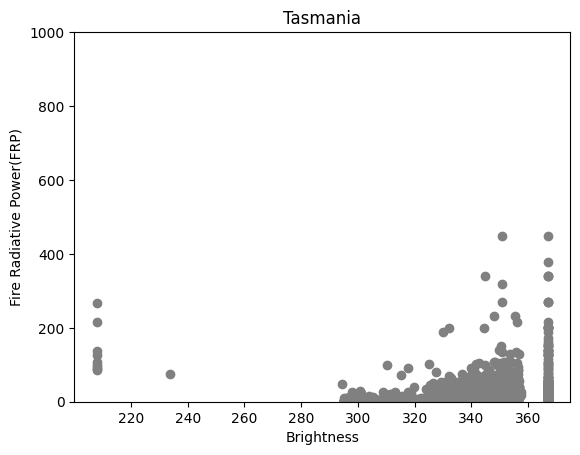

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

plt.scatter(Tasmania.bright_ti4, Tasmania.frp, color = "grey")
plt.ylim([0, 1000])

plt.title("Tasmania")
plt.xlabel("Brightness")
plt.ylabel("Fire Radiative Power(FRP)")

Text(0, 0.5, 'Fire Radiative Power(FRP)')

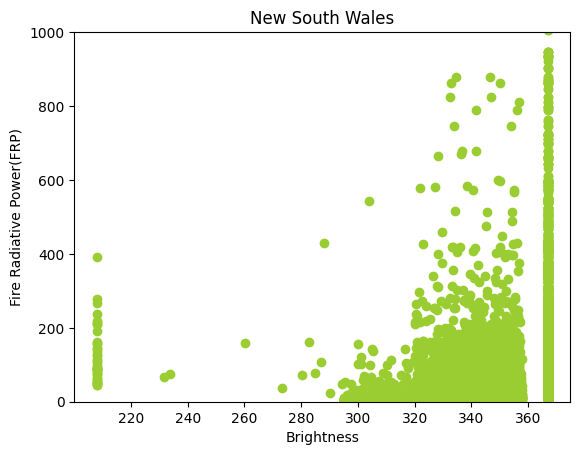

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

plt.scatter(NewSouthWales.bright_ti4, NewSouthWales.frp, color = "yellowgreen")
plt.ylim([0, 1000])

plt.title("New South Wales")
plt.xlabel("Brightness")
plt.ylabel("Fire Radiative Power(FRP)")

Text(0, 0.5, 'Fire Radiative Power(FRP)')

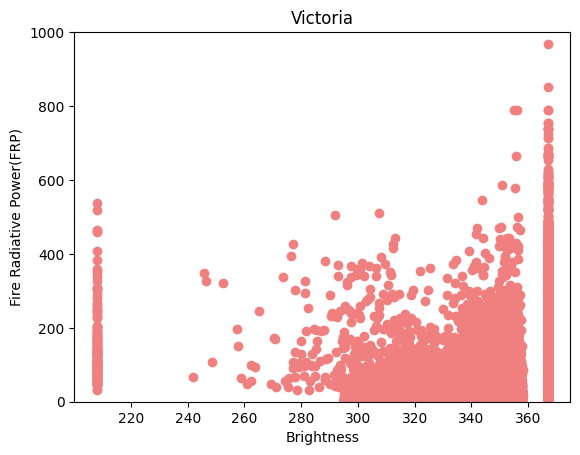

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

plt.scatter(Victoria.bright_ti4, Victoria.frp, color = "lightcoral")
plt.ylim([0, 1000])
plt.title("Victoria")
plt.xlabel("Brightness")
plt.ylabel("Fire Radiative Power(FRP)")

In [ ]:
from statsmodels.formula.api import ols

WA = ols("frp ~ bright_ti4", WesternAustralia).fit()
print("Western Australia")
print(WA.params)
print()

NT = ols("frp ~ bright_ti4", NorthernTerritory).fit()
print("Northern Territory")
print(NT.params)
print()

SA = ols("frp ~ bright_ti4", SouthAustralia).fit()
print("South Australia")
print(SA.params)
print()

Q = ols("frp ~ bright_ti4", Queensland).fit()
print("Queensland")
print(Q.params)
print()

T = ols("frp ~ bright_ti4", Tasmania).fit()
print("Tasmania")
print(T.params)
print()

NSW = ols("frp ~ bright_ti4", NewSouthWales).fit()
print("New South Wales")
print(NSW.params)
print()

Vic = ols("frp ~ bright_ti4", Victoria).fit()
print("Victoria")
print(Vic.params)
print()

Western Australia
Intercept    -176.956331
bright_ti4      0.579948
dtype: float64

Northern Territory
Intercept    -112.564066
bright_ti4      0.367496
dtype: float64

South Australia
Intercept    -227.490118
bright_ti4      0.746061
dtype: float64

Queensland
Intercept    -117.748523
bright_ti4      0.383822
dtype: float64

Tasmania
Intercept    -133.301228
bright_ti4      0.448835
dtype: float64

New South Wales
Intercept    -245.729549
bright_ti4      0.793527
dtype: float64

Victoria
Intercept    -161.783485
bright_ti4      0.525475
dtype: float64

